In [1]:
import numpy as np
from numpy import pi
from utils.units import *
from utils.consts import *
from matplotlib import pyplot as plt

In [2]:
# compute the differential shift between F=1,F=2 ground states in a simple-minded way

TFORT = 2e-3

d1 = 2*pi*c*(1/794.978850e-9 - 1/852e-9)
d2 = 2*pi*c*(1/780.241209e-9 - 1/852e-9)
d_eff = 1/((1/d1 + 2/d2)/3) # weighted average of D lines. 
# see "Oscillator strengths of the principal series lines of Rb", table 3

omega_hfs = 2*pi*6.834682e9

eta = omega_hfs/d_eff # see "Analysis of dephasing mechanisms in a standing-wave dipole trap" by Meschede group
diff_shift = eta*TFORT*kB/hbar
print("diff. shift/mK ~",(eta*1e-3*kB/hbar)/(2*pi))
print("diff. shift ~",diff_shift/(2*pi))

diff. shift/mK ~ 4814.663565388496
diff. shift ~ 9629.327130776992


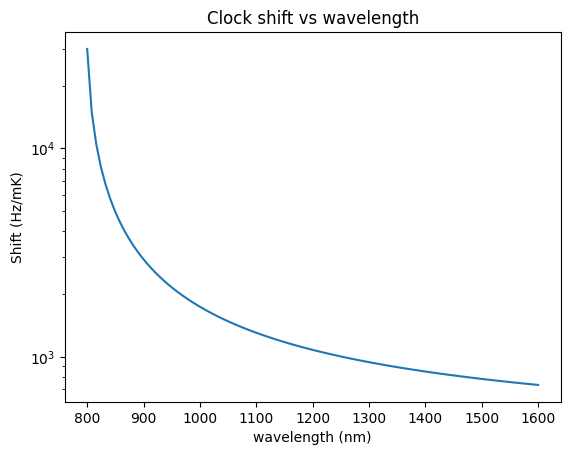

In [3]:
# compute the differential shift between F=1,F=2 ground states in a simple-minded way

wavelengths = np.linspace(800*nm, 1600*nm, 100)

d1 = 2*pi*c*(1/794.978850e-9 - 1/wavelengths)
d2 = 2*pi*c*(1/780.241209e-9 - 1/wavelengths)
d_eff = 1/((1/d1 + 2/d2)/3) # weighted average of D lines. 
# see "Oscillator strengths of the principal series lines of Rb", table 3

omega_hfs = 2*pi*6.834682e9

eta = omega_hfs/d_eff # see "Analysis of dephasing mechanisms in a standing-wave dipole trap" by Meschede group

fig,ax = plt.subplots()
ax.set_title("Clock shift vs wavelength")
ax.plot(wavelengths/nm, (eta*1e-3*kB/hbar)/(2*pi))
ax.set_ylabel("Shift (Hz/mK)")
ax.set_xlabel("wavelength (nm)")
ax.set_yscale('log')

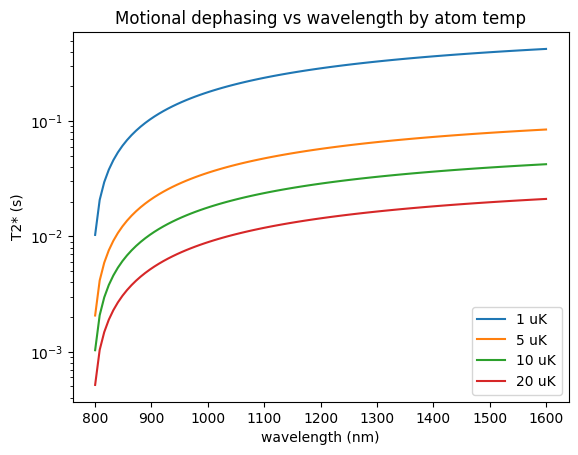

In [8]:
# motional T2* by atom temp

# a little surprising that this doesn't depend on trap depth.
# eta = omega_hfs/detuning = clock shift/trap depth

fig,ax = plt.subplots()
for T_atom in np.array([1*uK, 5*uK, 10*uK, 20*uK]):
    T2star_motion = np.sqrt(np.e**(2/3)-1)*2*hbar/(eta*kB*T_atom)
    ax.plot(wavelengths/nm, T2star_motion, label=f'{T_atom/uK:.0f} uK')
ax.set_title("Motional T2* vs wavelength by atom temp")
ax.set_ylabel("T2* (s)")
ax.set_xlabel("wavelength (nm)")
ax.set_yscale('log')
ax.legend()